# Titanic (Exploratory Data Analysis)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("train.csv")

In [5]:
data.shape

(891, 12)

In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Classificatoin of passengers on the basis of Sex:

Male passengers are more compared to female passengers
- Female = 314
- Male = 577

#### Survived vs Deceased:
- Survived = 342 (38%)
- Deceased = 549 (62%)

In [8]:
print(data.groupby('Sex').size())
print("----------------\n\n" + str(data.groupby("Survived").size()))

Sex
female    314
male      577
dtype: int64
----------------

Survived
0    549
1    342
dtype: int64


#### Classification of passengers (Survived vs Deceased) with respect to Sex:

###### Female passengers:
- Deceased (0) = 81 (26%)
- Survived (1) = 233 (74%)

###### Male passengers:
- Deceased (0) = 468 (81%)
- Survived (1) = 109 (19%)

##### Hence, Survival rate of female passengers is more as compared to male passengers.

In [9]:
cond_f1 = data["Sex"] == "female"
#cond_f2 = data["Survived"] == 1
print("Sex = Female, Survived(1) vs Died(0)\n" + str(data[cond_f1].groupby("Survived").size()))

cond_m1 = data["Sex"] == "male"
print("--------------------------\nSex = Male, Survived(1) vs Died(0)\n" + str(data[cond_m1].groupby("Survived").size()))

Sex = Female, Survived(1) vs Died(0)
Survived
0     81
1    233
dtype: int64
--------------------------
Sex = Male, Survived(1) vs Died(0)
Survived
0    468
1    109
dtype: int64


#### Visualising of Survived vs Deceased with respect to Sex using bar plot.

Text(0.5,1,'Survived vs Deceased (Male)')

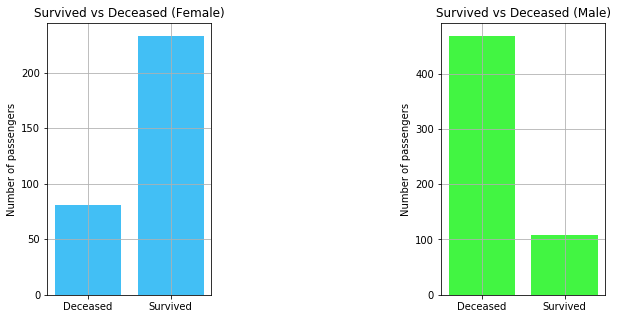

In [10]:
# Female passengers Survived vs Deceased
x_label = ["Deceased", "Survived"]
y_f = data[cond_f1].groupby("Survived").size()

plt.figure(figsize = (10, 5))
plt.subplot(1, 3, 1)
plt.bar(x_label, y_f, color="#42bff5")
plt.grid()
plt.ylabel("Number of passengers")
plt.title("Survived vs Deceased (Female)")

# Male passengers Survived vs Deceased
y_f = data[cond_m1].groupby("Survived").size()

plt.subplot(1, 3, 3)
plt.grid()
plt.bar(x_label, y_f, color="#42f542")
plt.ylabel("Number of passengers")
plt.title("Survived vs Deceased (Male)")

#### Classification of passengers on the basis of class of ticket (Pclass):
- 1 (Rich) = 216 (24%)
- 2 (Intermediate or Middle class) = 184 (21%)
- 3 (Poor) = 491 (55%)
<br><br>
Majority of people belong to class-3.

In [11]:
data.groupby("Pclass").size()

Pclass
1    216
2    184
3    491
dtype: int64

#### Visualization of Survived vs Deceased with respect to the class of ticket (Pclass).
- Class-1: More passengers survived who were travelling in class-1.
- Class-2: Percentage difference between the number of passengers survived and deceased is less.
- Class-3: Majority of passengers deceased, Only few passengers survived.
<br><br>
Survival rate increases as the class of ticket increses.
<br>
Hence, Rich passengers have higher chances of survival as compared to poor passengers.

Text(0.5,1,'(Pclass = 3)')

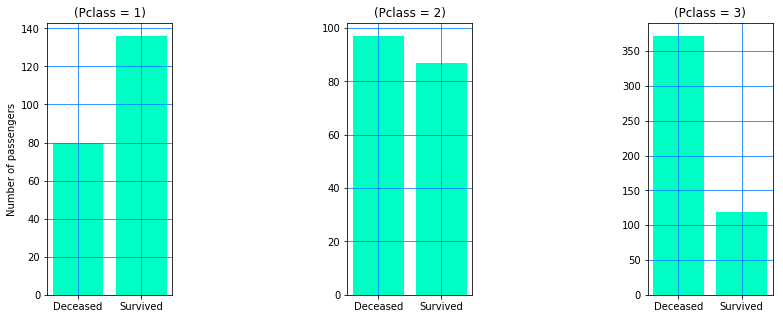

In [12]:
# Survived vs Deceased based on Pclass
y_pclass1 = data[data["Pclass"] == 1].groupby("Survived").size()
y_pclass2 = data[data["Pclass"] == 2].groupby("Survived").size()
y_pclass3 = data[data["Pclass"] == 3].groupby("Survived").size()


plt.figure(figsize = (13, 5))

# Pclass - 1
plt.subplot(1, 5 ,1)
plt.bar(x_label, y_pclass1, color = "#00ffc4")
plt.grid(color='#007bff')
plt.title("(Pclass = 1)")
plt.ylabel("Number of passengers")

# Pclass - 2
plt.subplot(1, 5, 3)
plt.bar(x_label, y_pclass2, color = "#00ffc4")
plt.grid(color='#007bff')
plt.title("(Pclass = 2)")

# Pclass - 3
plt.subplot(1, 5, 5)
plt.bar(x_label, y_pclass3, color = "#00ffc4")
plt.grid(color='#007bff')
plt.title("(Pclass = 3)")


#### Comparison of Survived vs Deceased with respect to { Age, Pclass-1 (Rich) and Pclass-3 (Poor) } 
- As rich passengers survival rate is higher than poor passengers. And as the age increases survival rate should also increase.

##### Some rich passengers above age 50 deceased?
##### Many poor passengers below age 35 survived?

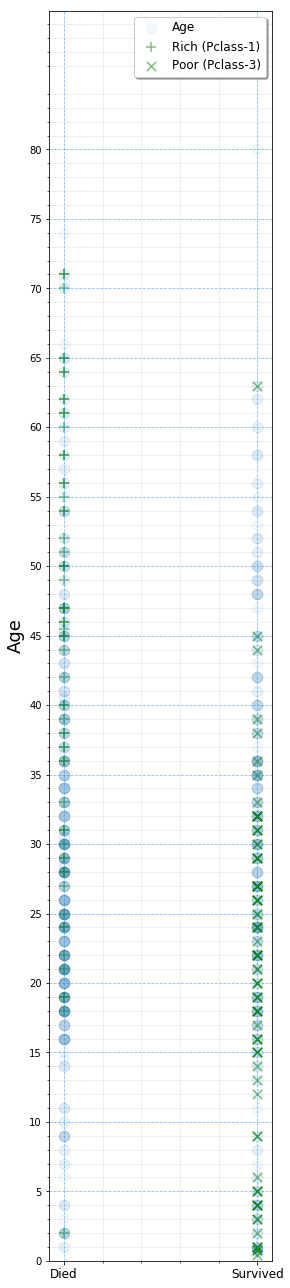

In [13]:
# Comparing survival rate within Age groups

x_age = data["Survived"]
y_age = data["Age"]

# Comparison of Survived vs Deceased with Age
plt.figure(figsize = (4, 23))
plt.scatter(x_age, y_age, alpha = 0.05, s = 110)

plt.grid(b=True, which='major', color='#007bff', linestyle='--', alpha=0.5)
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

plt.minorticks_on()
plt.ylabel("Age", fontsize=18)

# Comparison of Survived vs Deceased with the (poverty)
y_rich = data[(data["Pclass"] == 1) & (data["Survived"] == 0)]
y_poor = data[(data["Pclass"] == 3) & (data["Survived"] == 1)]

plt.scatter(y_rich["Survived"], y_rich["Age"], marker = "+", color = "green", s = 90, alpha = 0.5)
plt.scatter(y_poor["Survived"], y_poor["Age"], marker = "x", color = "green", s = 90, alpha = 0.5)

plt.xticks([0, 1], ["Died", "Survived"], fontsize=12)
plt.yticks(np.arange(0, 82, 5))
plt.ylim(0, 90)

plt.legend(["Age", "Rich (Pclass-1)", "Poor (Pclass-3)"], fontsize = "large", shadow = True)

(424, 12)
(290, 12)


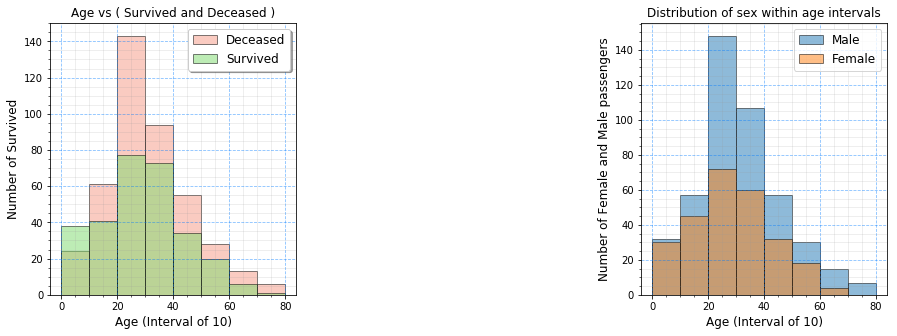

In [14]:
# Filetering as ( Age not equal to NaN and Passengers who didn't survive )
cond_d = data[(data["Survived"] == 0) & (data["Age"].notnull())]

print(cond_d.shape)

x_ages = cond_d["Age"]
bins_range = np.arange(0, 90, 10) #[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

plt.figure(figsize = (15, 5))

plt.subplot(1, 3, 1)
plt.hist(x_ages, bins = bins_range, facecolor = "#F69884", edgecolor = "black", alpha = 0.5)
plt.grid()
plt.xlabel("Age (Interval of 10)", fontsize = 12)
plt.ylabel("Number of deaths", fontsize = 12)

# ==========================================================================================================

cond_d1 = data[(data["Survived"] == 1) & (data["Age"].notnull())]

print(cond_d1.shape)

x_ages = cond_d1["Age"]
bins_range = np.arange(0, 90, 10) #[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

plt.hist(x_ages, bins = bins_range, facecolor = "#7DDB6D", edgecolor = "black", alpha = 0.5)
plt.grid(True)
plt.title("Age vs ( Survived and Deceased )", fontsize = 12)
plt.xlabel("Age (Interval of 10)", fontsize = 12)
plt.ylabel("Number of Survived", fontsize = 12)

plt.grid(b=True, which='major', color='#007bff', linestyle='--', alpha=0.5)
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

plt.minorticks_on()

plt.legend(("Deceased", "Survived"), fontsize = "large", shadow = True)

# ==========================================================================================================

# Age distribution of Passengers

plt.subplot(1, 3, 3)
cond_d2 = data[data["Age"].notnull()]

cond_male = data[(data["Age"].notnull()) & (data["Sex"] == "male")]
cond_female = data[(data["Age"].notnull()) & (data["Sex"] == 'female')]

x_popul = cond_d2["Age"]

plt.hist(cond_male["Age"], bins = bins_range, edgecolor = "black", alpha = 0.5, label = "Male")
plt.hist(cond_female["Age"], bins = bins_range, edgecolor = "black", alpha = 0.5, label = "Female")


plt.grid(True)
plt.title("Distribution of sex within age intervals", fontsize = 12)
plt.xlabel("Age (Interval of 10)", fontsize = 12)
plt.ylabel("Number of Female and Male passengers", fontsize = 12)

plt.grid(b=True, which='major', color='#007bff', linestyle='--', alpha=0.5)
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

plt.minorticks_on()
plt.legend(fontsize = 12)

In [15]:
# Survival rate calculation:
data.columns
# Survival / (Survived + Deceased) 

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

#### Calculating Survival rate of passengers with in age intervals
Survival / (Survived + Deceased)

In [16]:
# Total number of passengers calssified into age intervals
new_df1 = cond_d2.groupby(pd.cut(cond_d2["Age"], bins_range)).count()
 
# Passengers survived classified into age intervals
new_df2 = cond_d1.groupby(pd.cut(cond_d1["Age"], bins_range)).count()

print((new_df2["Age"] / new_df1["Age"]) * 100)

Age
(0, 10]     59.375000
(10, 20]    38.260870
(20, 30]    36.521739
(30, 40]    44.516129
(40, 50]    38.372093
(50, 60]    40.476190
(60, 70]    23.529412
(70, 80]    20.000000
Name: Age, dtype: float64
